In [1]:
import json
from datetime import datetime

import numpy as np

from utils import SetUpstreamSteererAtStep


# Notebook for Shift with Chenran

Shift on  28 and 29 September 2022 for testing Bayesian Optimisation (BO) against Reinforcement Learning (RL).

Once we know BO is working in the machine, the plan is to test BO and RL in pairs on the same problems (targets) and compare their performance in the real world.

In [2]:
# Define target (and thresholds) ... max steps is chosen seperately for each algorithm
# comment = "test"

# target_mu_x = 0.0
# target_sigma_x = 0.0
# target_mu_y = 0.0
# target_sigma_y = 0.0

# target_mu_x_threshold = 3.3198e-6
# target_mu_y_threshold = 3.3198e-6
# target_sigma_x_threshold = 3.3198e-6
# target_sigma_y_threshold = 3.3198e-6


In [3]:
# # Load problem
problem_index = 33

with open("problems.json", "r") as f:
    problem = json.load(f)[problem_index]

comment = f"problem_{problem_index:03d}"

# Note that the indicies are still according to the old order mu_x, mu_y, sigma_x, sigma_y
target_mu_x = problem["desired"][0]
target_sigma_x = problem["desired"][2]
target_mu_y = problem["desired"][1]
target_sigma_y = problem["desired"][3]
target_mu_x_threshold = 3.3198e-6
target_mu_y_threshold = 3.3198e-6
target_sigma_x_threshold = 3.3198e-6
target_sigma_y_threshold = 3.3198e-6


In [4]:
from ea_optimize import ARESEADOOCS

env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
env = SetUpstreamSteererAtStep(env, steps_to_trigger=40, steerer="ARLIMCHM1", mrad=0.2196)
env.reset()


initializing ocelot...


{'beam': array([ 0.00104242,  0.00058079, -0.00089801,  0.00039898], dtype=float32),
 'magnets': array([-2.5818379e-11, -2.5818379e-11, -6.9177379e-09, -2.5818379e-11,
        -6.9087887e-09], dtype=float32),
 'target': array([0.00167267, 0.00188481, 0.00159524, 0.00155146], dtype=float32)}

 11%|█▏        | 9/80 [01:34<12:47, 10.81s/it]/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/botorch/optim/optimize.py:306: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 1.')]
Trying again with a new set of initial conditions.
  warnings.warn(first_warn_msg, RuntimeWarning)
 25%|██▌       | 20/80 [03:37<11:07, 11.12s/it]/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/botorch/optim/optimize.py:306: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 1.')]
Trying again with a new set of initial conditions.
  warnings.warn(first_warn_msg, RuntimeWarning)
 50%|█████     | 40/80 [07:09<06:47, 10.18s/it]

Triggering disturbance


 98%|█████████▊| 78/80 [13:58<00:21, 10.63s/it]/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/botorch/optim/optimize.py:306: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 1.')]
Trying again with a new set of initial conditions.
  warnings.warn(first_warn_msg, RuntimeWarning)
81it [14:31, 10.76s/it]                        


title = 'Beam Optimisation on AREABSCR1 using Bayesian Optimisation'
msg = 'Bayesian Optimisation optimised beam on AREABSCR1\n\nAgent: Bayesian Optimisation\nStart time: 2022-12-20 13:46:44.709858\nTime taken: 0:14:40.728981\nNo. of steps: 81\n\nBeam before:\n    mu_x    =  1.0474 mm\n    sigma_x =  0.5737 mm\n    mu_y    = -0.8870 mm\n    sigma_y =  0.3959 mm\n\nBeam after:\n    mu_x    = -1.1038 mm\n    sigma_x =  0.2495 mm\n    mu_y    = -1.8291 mm\n    sigma_y =  0.0717 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0033 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0033 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0054 mm\n    |delta_sigma_x| =  0.0216 mm\n    |delta_mu_y|    =  0.0843 mm\n    |delta_sigma_y| =  0.1250 mm\n\n    MAE =  0.0591 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   9.0053 1/m^2\n    AREAMQZM2 strength = -20.6130 1/m^2\n    AREAMCVM1 kick     =  -0.

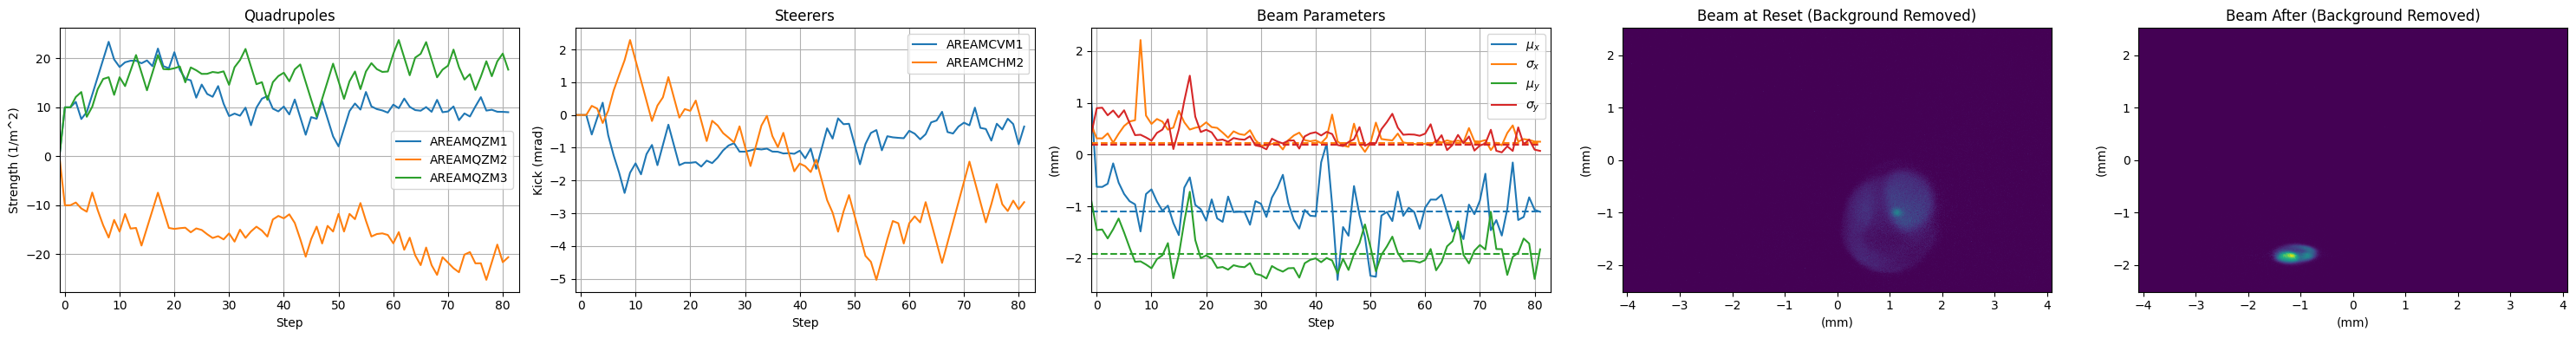

In [5]:
# Bayesian Optimisation
from ea_bo import optimize

optimize(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=80,
    model_name="Bayesian Optimisation",
    logbook=True,
    data_log_dir=f"data/bo_vs_rl/real/bo/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
    acquisition="EI",
    init_x=None,
    init_samples=5,
    filter_action=None,
    magnet_init_values=np.array([10, -10, 0, 10, 0]),
)


In [12]:
from ea_optimize import ARESEADOOCS

env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
env = SetUpstreamSteererAtStep(env, steps_to_trigger=40, steerer="ARLIMCHM1", mrad=0.2196)
env.reset()


{'beam': array([ 0.00103246,  0.00057233, -0.00105217,  0.00040106], dtype=float32),
 'magnets': array([-2.5818379e-11, -2.8285231e-03,  8.1280665e-14, -2.5818379e-11,
         8.1175511e-14], dtype=float32),
 'target': array([-1.7467820e-03,  2.5566519e-04,  1.0087519e-03,  1.7113438e-05],
       dtype=float32)}

/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
  warnings.warn(
 50%|█████     | 40/80 [07:05<06:07,  9.20s/it]

Triggering disturbance


100%|██████████| 80/80 [15:45<00:00, 11.82s/it]


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2022-12-20 14:02:32.618102\nTime taken: 0:15:58.048431\nNo. of steps: 80\n\nBeam before:\n    mu_x    =  0.9412 mm\n    sigma_x =  0.5822 mm\n    mu_y    = -1.0595 mm\n    sigma_y =  0.4135 mm\n\nBeam after:\n    mu_x    = -1.0989 mm\n    sigma_x =  0.2284 mm\n    mu_y    = -1.9220 mm\n    sigma_y =  0.2026 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0033 mm) ;)\n    sigma_x =  0.2279 mm    (e = 0.0033 mm) ;)\n    mu_y    = -1.9133 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0033 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0004 mm\n    |delta_sigma_x| =  0.0005 mm\n    |delta_mu_y|    =  0.0087 mm\n    |delta_sigma_y| =  0.0059 mm\n\n    MAE =  0.0039 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   6.4661 1/m^2\n    AREAMQZM2 strength = -17.8036 1/m^2\n    AREAMCVM1 kick     

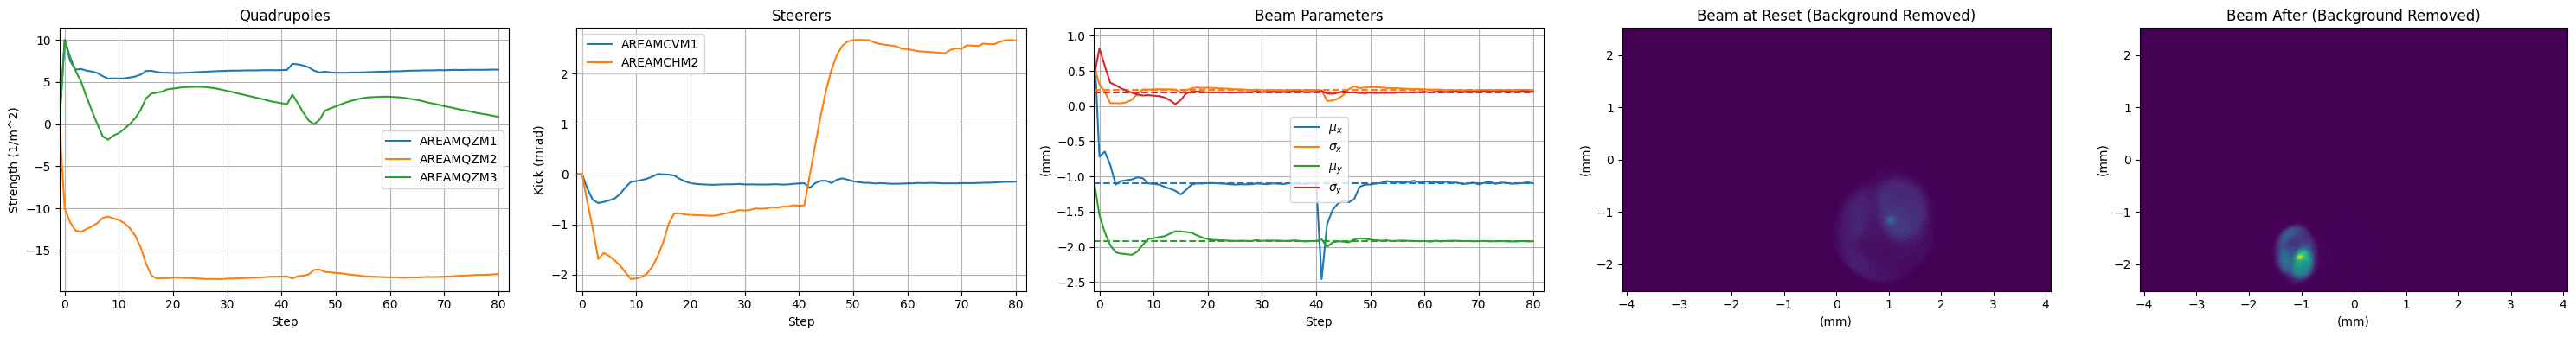

In [7]:
# Reinforcement Learning
from ea_optimize import optimize_donkey

optimize_donkey(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=80,
    model_name="polished-donkey-996",
    logbook=True,
    data_log_dir=f"data/bo_vs_rl/real/rl/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
)


In [8]:
# from ea_optimize import ARESEADOOCS

# env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
# env.reset()


In [9]:
# # Bayesian Optimisation
# from ea_bo import optimize

# optimize(
#     target_mu_x=target_mu_x,
#     target_sigma_x=target_sigma_x,
#     target_mu_y=target_mu_y,
#     target_sigma_y=target_sigma_y,
#     target_mu_x_threshold=target_mu_x_threshold,
#     target_mu_y_threshold=target_mu_y_threshold,
#     target_sigma_x_threshold=target_sigma_x_threshold,
#     target_sigma_y_threshold=target_sigma_y_threshold,
#     max_steps=75,
#     model_name="Bayesian Optimisation",
#     logbook=True,
#     data_log_dir=f"data/bo_vs_rl/real/bo_ucb/{datetime.now():%Y%m%d%H%M}_{comment}",
#     progress_bar=True,
#     callback=None,
#     acquisition="UCB",
#     init_x=None,
#     init_samples=5,
#     filter_action=None,
#     magnet_init_values=np.array([10, -10, 0, 10, 0]),
# )


In [10]:
# from ea_optimize import ARESEADOOCS

# env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
# env.reset()


In [11]:
# Reinforcement Learning with BO takeover
# from ea_rlbo import optimize_donkey_bo_combo

# bo_takeover = 0.00015

# optimize_donkey_bo_combo(
#     target_mu_x=target_mu_x,
#     target_sigma_x=target_sigma_x,
#     target_mu_y=target_mu_y,
#     target_sigma_y=target_sigma_y,
#     target_mu_x_threshold=target_mu_x_threshold,
#     target_mu_y_threshold=target_mu_y_threshold,
#     target_sigma_x_threshold=target_sigma_x_threshold,
#     target_sigma_y_threshold=target_sigma_y_threshold,
#     max_steps=50,
#     model_name="polished-donkey-996",
#     logbook=True,
#     data_log_dir=f"data/bo_vs_rl/real/rl_bo_takeover_{bo_takeover}/{datetime.now():%Y%m%d%H%M}_{comment}",
#     progress_bar=True,
#     callback=None,
#     acquisition="UCB",
#     rl_steps=10,
#     bo_takeover=bo_takeover,
#     beta=0.01,
#     stepsize=0.05,
# )
